Cell 1: Install Required Libraries and Set Random Seeds

---
We begin by installing  the necessary libraries for our experiments. We then set random seeds for PyTorch. We also check for GPU availability and set the device accordingly, prioritizing GPU usage if available.

In [ ]:
# Cell 1: Install required libraries
!pip install torch torchvision transformers datasets matplotlib peft timm

import torch
import random
import numpy as np

torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used.")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Cell 2: Data Loading, Transformations, and Visualization

---
Now, we load the CIFAR-10 dataset, applying transformations to the images for training and testing. We resize images to 224x224, and for training, add random cropping and horizontal flipping for data augmentation. We normalize the images to have a mean and standard deviation of 0.5. The CIFAR-10 data is downloaded and its checksum is verified. Finally, we split the training data into training and validation sets and create data loaders for each set. We also visualize a few images from the training set to get an overview of the data.

100%|██████████| 170M/170M [00:02<00:00, 65.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Checksum verification passed for cifar-10-python.tar.gz
Training Samples: 40000
Validation Samples: 10000
Test Samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


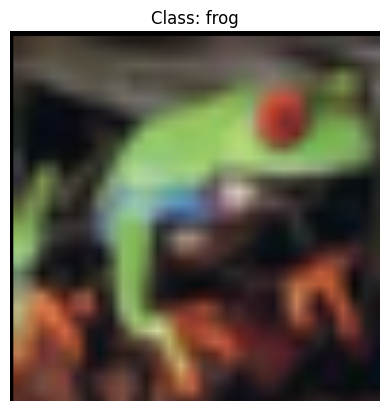

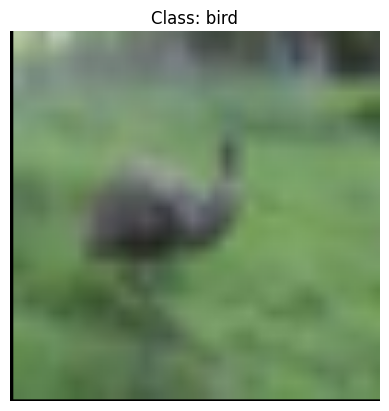

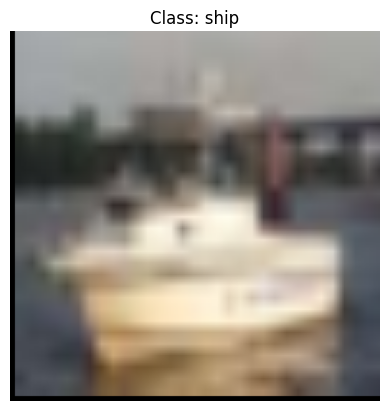

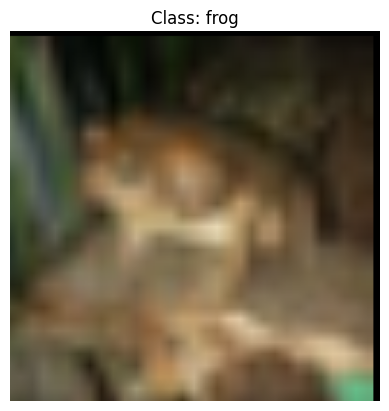

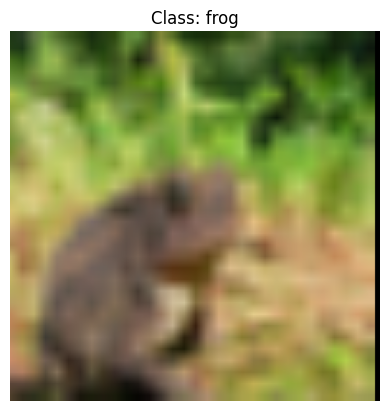

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import os
import hashlib

# Transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.RandomCrop(224, padding=4), # Data augmentation
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10
data_path = './data'  # Set data path
train_data = datasets.CIFAR10(root=data_path, train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(root=data_path, train=False, download=True, transform=transform_test)

# Verify CIFAR-10 checksum
cifar10_files = ["cifar-10-python.tar.gz"]
expected_checksums = {"cifar-10-python.tar.gz": "c58f30108f718f92721af3b95e74349a"}

for file_name in cifar10_files:
    file_path = os.path.join(data_path, file_name)
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        if file_hash != expected_checksums[file_name]:
            print(f"Checksum mismatch for {file_name}. Attempting to re-download.")
            os.remove(file_path)
            datasets.CIFAR10(root=data_path, train=True, download=True, transform=transform_train)
            datasets.CIFAR10(root=data_path, train=False, download=True, transform=transform_test)
        else:
            print(f"Checksum verification passed for {file_name}")
    else:
        print(f"{file_name} not found. Downloading now.")
        datasets.CIFAR10(root=data_path, train=True, download=True, transform=transform_train)
        datasets.CIFAR10(root=data_path, train=False, download=True, transform=transform_test)

# Split training data into training and validation sets
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])

# Data Loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)  # Adjust batch size as needed
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Debugging: Dataset Overview
print(f"Training Samples: {len(train_data)}")
print(f"Validation Samples: {len(val_data)}")
print(f"Test Samples: {len(test_data)}")
print(f"Classes: {train_data.dataset.classes}")

# Visualize a few images
def visualize_images(dataset, num_images=5):
    for i in range(num_images):
        image, label = dataset[i]
        plt.imshow(image.permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Denormalize for visualization
        plt.title(f"Class: {train_data.dataset.classes[label]}")
        plt.axis('off')
        plt.show()

visualize_images(train_data)


Cell 3: Model Definition, Training, and Evaluation Functions

---
Here, we load a pre-trained ViT-Tiny model from the TIMM library, configured to output feature embeddings instead of directly predicting classes.

We create a simple classification head that takes the feature embeddings (specifically the CLS token) and outputs class probabilities.

The training function is updated to use the ViT-Tiny model with the classification head, including selecting the CLS token for classification.

Similar to training, the evaluation function is updated to work with the ViT-Tiny model, calculating loss, accuracy, and average inference time.
Memory and Time Measurement: Functions are defined to measure peak memory usage during training and average inference time.

In [ ]:
import timm
import torch.nn as nn
import torch.optim as optim
import time
import tracemalloc

print("🔹 Loading pretrained ViT-Tiny model from TIMM... ⏳")
# Load ViT-Tiny as a feature extractor (num_classes=0 so it returns features)
vit = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0).to(device)
print(" ViT-Tiny model loaded successfully.")

# Define the classification head using vit.embed_dim (for ViT-Tiny, embed_dim is typically 192)
class ClassificationHead(nn.Module):
    def __init__(self, hidden_size, num_labels):
        super().__init__()
        self.fc = nn.Linear(hidden_size, num_labels)
    def forward(self, x):
        return self.fc(x)

classification_head = ClassificationHead(vit.embed_dim, 10).to(device)

# Updated training function: select the CLS token (first token) before classification
def train_model(model, optimizer, train_loader, val_loader, criterion, device, classification_head, epochs=5):
    model.train()  # Set model in train mode
    start_time = time.time()  # Start timer
    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            # Get all token features then select the first token (CLS)
            features = model.forward_features(inputs)
            cls_features = features[:, 0]
            outputs = classification_head(cls_features)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {correct / total * 100:.2f}%")
    training_time = time.time() - start_time
    return training_time

# Updated evaluation function: also select the CLS token before classification
def evaluate_model(model, test_loader, criterion, device, classification_head):
    model.eval()
    correct = 0
    total = 0
    epoch_loss = 0
    inference_time = 0
    with torch.no_grad():
        start_time = time.time()  # Start timer
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            features = model.forward_features(inputs)
            cls_features = features[:, 0]
            outputs = classification_head(cls_features)
            loss = criterion(outputs, labels)
            epoch_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            end_time = time.time()
            batch_inference_time = (end_time - start_time) * 1000  # time per batch in ms
            inference_time += batch_inference_time
            start_time = time.time()  # Reset timer for next batch
    accuracy = correct / total * 100
    avg_loss = epoch_loss / len(test_loader)
    avg_inference_time = inference_time / len(test_loader)
    return avg_loss, accuracy, avg_inference_time

# Functions to measure memory usage and inference time remain the same.
def measure_memory_usage(model, data_loader, criterion, device, type='training', classification_head=None):
    tracemalloc.start()
    if type == 'training':
        optimizer = optim.AdamW(model.parameters(), lr=1e-4)
        train_model(model, optimizer, train_loader, val_loader, criterion, device, classification_head, epochs=5)
    elif type == 'evaluation':
        evaluate_model(model, data_loader, criterion, device, classification_head)
    else:
        raise ValueError("type must be either training or evaluation")
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / 10**6  # in MB

def measure_inference_time(model, data_loader, criterion, device, classification_head=None):
    _, _, avg_inference_time = evaluate_model(model, data_loader, criterion, device, classification_head)
    return avg_inference_time

# Define loss function
criterion = nn.CrossEntropyLoss()

# Initialize results dictionary (will be populated in later cells)
results = {}
results["Baseline"] = {
    "Accuracy": 0,
    "Loss": 0,
    "Memory (MB)": 0,
    "Inference Time (ms)": 0,
    "Training Time (s)": 0
}


🔹 Loading pretrained ViT-Tiny model from TIMM... ⏳


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

✅ ViT-Tiny model loaded successfully.


Cell 4: Integrate Adaptors

---
Now, we focus on integrating Adaptor layers into the ViT-Tiny model. We freeze all the pre-trained parameters and add Adaptor layers to the attention modules within each block of the ViT model. We ensure that only the parameters of the Adaptor layers are trainable, while the original model parameters remain frozen.

In [ ]:
from torch import nn

def integrate_adaptors(model, bottleneck_dim, device):
    """
    Freezes all parameters in the model and integrates Adaptor layers, ensuring only adaptors remain trainable.
    This version is adapted for the TIMM ViT-Tiny model.
    """
    print("\nRunning Cell 4: Freezing Parameters & Integrating Adaptors...\n")

    # Check if adaptors are already integrated
    already_integrated = all(
        hasattr(block.attn, "adaptor_q") and hasattr(block.attn, "adaptor_v")
        for block in model.blocks
    )
    if already_integrated:
        print("Adaptors already integrated in all layers. Skipping reintegration.\n")
        return model

    # Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False

    # Debug: Verify all layers are frozen
    frozen_count, trainable_count = 0, 0
    print("\n Debug: Checking Frozen Parameters BEFORE Adding Adaptors...\n")
    for name, param in model.named_parameters():
        if param.requires_grad:
            trainable_count += 1
            print(f"Unexpectedly Trainable | {name}")
        else:
            frozen_count += 1
    print(f"\nFreeze Verification Complete: {frozen_count} frozen, {trainable_count} trainable (expected: 0 trainable)\n")

    # Define a simple adaptor layer
    class AdaptorLayer(nn.Module):
        def __init__(self, input_dim, bottleneck_dim):
            super().__init__()
            self.down = nn.Linear(input_dim, bottleneck_dim)
            self.relu = nn.ReLU()
            self.up = nn.Linear(bottleneck_dim, input_dim)
        def forward(self, x):
            return self.up(self.relu(self.down(x)))

    found_adaptors = 0
    for block in model.blocks:
        attn_module = block.attn
        # Inject adaptor layers if missing.
        if not hasattr(attn_module, "adaptor_q"):
            attn_module.adaptor_q = AdaptorLayer(model.embed_dim, bottleneck_dim)
        if not hasattr(attn_module, "adaptor_v"):
            attn_module.adaptor_v = AdaptorLayer(model.embed_dim, bottleneck_dim)
        # Ensure only adaptor layers are trainable.
        for param in attn_module.adaptor_q.parameters():
            param.requires_grad = True
        for param in attn_module.adaptor_v.parameters():
            param.requires_grad = True
        found_adaptors += 1

    print(f"\n Added {found_adaptors} Adaptor Layers (adaptor_q, adaptor_v)...\n")
    model.to(device)

    # Debug: Verify trainable parameters after adding adaptors
    frozen_count, trainable_count = 0, 0
    print("\n Debug: Checking Trainable Parameters AFTER Adding Adaptors...\n")
    for name, param in model.named_parameters():
        if param.requires_grad:
            trainable_count += 1
            print(f"Trainable | {name}")
        else:
            frozen_count += 1
    print(f"\n Final Parameter Count: {frozen_count} frozen, {trainable_count} trainable (expected: only adaptors trainable)\n")
    return model


Cell 5: LoRA Configuration

---
The configuration for LoRA (Low-Rank Adaptation) is defined. We specify the target modules (the combined "qkv" projection in the attention module), rank of the low-rank matrices, scaling factor, and dropout rate for LoRA.

In [ ]:
from peft import LoraConfig, get_peft_model
import torch.nn as nn
import torch.optim as optim

# Define LoRA Configuration for TIMM ViT-Tiny (targeting the 'qkv' linear layer)
def get_lora_config(rank):
    return LoraConfig(
        r=rank,               # Rank of the low-rank matrices
        lora_alpha=32,        # Scaling factor for low-rank updates
        target_modules=["qkv"],  # Apply LoRA to the combined QKV projection
        lora_dropout=0.1,     # Dropout rate for LoRA
        bias="none"           # No additional bias
    )


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cell 5a: Define Configuration Grid

---
Now, we define a grid of hyperparameter configurations to explore for Adaptors and LoRA. For Adaptors, we vary the bottleneck dimension, and for LoRA, we vary the rank. This grid will guide the training and evaluation process in cell 6.

In [ ]:
# Cell 5a: Define configuration grid
adaptor_bottleneck_dims = [32, 64, 128]
lora_ranks = [4, 8, 16]

# Define a list of fine-tuning methods to explore
fine_tuning_methods = ["baseline", "adaptors", "lora"]


Cell 5b: Initialize the Results Dictionary

---
A dictionary is initialized to store the results of our experiments for each fine-tuning method and configuration. This dictionary will be populated with accuracy, loss, memory usage, inference time, and training time for each method is initialized.

In [ ]:
# Cell 5b: Store results
results = {}

for fine_tuning_method in fine_tuning_methods:
    if fine_tuning_method == "adaptors":
        for bottleneck_dim in adaptor_bottleneck_dims:
            config_name = f"Adaptors_Bottleneck_{bottleneck_dim}"
            results[config_name] = {
                "Accuracy": 0,
                "Loss": 0,
                "Memory (MB)": 0,
                "Inference Time (ms)": 0,
                "Training Time (s)": 0
            }
    elif fine_tuning_method == "lora":
        for rank in lora_ranks:
            config_name = f"LoRA_Rank_{rank}"
            results[config_name] = {
                "Accuracy": 0,
                "Loss": 0,
                "Memory (MB)": 0,
                "Inference Time (ms)": 0,
                "Training Time (s)": 0
            }
    else:  # Baseline
        results["Baseline"] = {
            "Accuracy": 0,
            "Loss": 0,
            "Memory (MB)": 0,
            "Inference Time (ms)": 0,
            "Training Time (s)": 0
        }


Cell 6: Training & Evaluation Loop for All Methods

---
Here, we implement the main training and evaluation loop for all fine-tuning methods: baseline, Adaptors, and LoRA.

Baseline: We train and evaluate the pre-trained ViT-Tiny model without any modifications.

Adaptors: We iterate through the Adaptor configurations, integrating Adaptor layers, training the model with only Adaptor parameters trainable, and evaluating the performance.

LoRA: Similarly, we iterate through the LoRA configurations, applying LoRA to the model, training, and evaluating.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from peft import get_peft_model, LoraConfig
import time
import tracemalloc

# Training and Evaluation loop across methods
for fine_tuning_method in fine_tuning_methods:
    print(f"\nStarting fine-tuning method: {fine_tuning_method.capitalize()}")

    if fine_tuning_method == "baseline":
        # Baseline Fine-Tuning with ViT-Tiny
        print("Loading baseline ViT-Tiny model...")
        vit = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0).to(device)
        classification_head = ClassificationHead(vit.embed_dim, 10).to(device)
        optimizer_baseline = optim.AdamW(list(vit.parameters()) + list(classification_head.parameters()), lr=1e-4)
        training_time = train_model(vit, optimizer_baseline, train_loader, val_loader, criterion, device, classification_head, epochs=5)
        loss, accuracy, inference_time = evaluate_model(vit, test_loader, criterion, device, classification_head)
        memory = measure_memory_usage(vit, train_loader, criterion, device, type="training", classification_head=classification_head)
        eval_memory = measure_memory_usage(vit, test_loader, criterion, device, type="evaluation", classification_head=classification_head)
        results["Baseline"] = {
            "Accuracy": accuracy,
            "Loss": loss,
            "Memory (MB)": (memory + eval_memory) / 2,
            "Inference Time (ms)": inference_time,
            "Training Time (s)": training_time
        }

    elif fine_tuning_method == "adaptors":
        for bottleneck_dim in adaptor_bottleneck_dims:
            print(f"  - Bottleneck Dimension: {bottleneck_dim}")
            vit_with_adaptors = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0).to(device)
            vit_with_adaptors = integrate_adaptors(vit_with_adaptors, bottleneck_dim=bottleneck_dim, device=device)
            classification_head = ClassificationHead(vit_with_adaptors.embed_dim, 10).to(device)
            optimizer_adaptor = optim.AdamW(
                list(filter(lambda p: p.requires_grad, vit_with_adaptors.parameters())) +
                list(classification_head.parameters()), lr=5e-4
            )
            training_time = train_model(vit_with_adaptors, optimizer_adaptor, train_loader, val_loader, criterion, device, classification_head, epochs=5)
            loss, accuracy, inference_time = evaluate_model(vit_with_adaptors, test_loader, criterion, device, classification_head)
            memory = measure_memory_usage(vit_with_adaptors, train_loader, criterion, device, type="training", classification_head=classification_head)
            eval_memory = measure_memory_usage(vit_with_adaptors, test_loader, criterion, device, type="evaluation", classification_head=classification_head)
            config_name = f"Adaptors_Bottleneck_{bottleneck_dim}"
            results[config_name] = {
                "Accuracy": accuracy,
                "Loss": loss,
                "Memory (MB)": (memory + eval_memory) / 2,
                "Inference Time (ms)": inference_time,
                "Training Time (s)": training_time
            }

    elif fine_tuning_method == "lora":
        for rank in lora_ranks:
            print(f"  - LoRA Rank: {rank}")
            vit_with_lora = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=0).to(device)
            lora_config = get_lora_config(rank)
            vit_with_lora = get_peft_model(vit_with_lora, lora_config).to(device)
            classification_head = ClassificationHead(vit_with_lora.embed_dim, 10).to(device)
            print("\nTrainable parameters before freezing:")
            for name, param in vit_with_lora.named_parameters():
                if param.requires_grad:
                    print(f"  - {name}")
            for name, param in vit_with_lora.named_parameters():
                if not param.requires_grad:
                    print(f"Frozen: {name}")
                else:
                    print(f"Trainable: {name}")
            optimizer_lora = optim.AdamW(
                list(filter(lambda p: p.requires_grad, vit_with_lora.parameters())) +
                list(classification_head.parameters()), lr=5e-4
            )
            training_time = train_model(vit_with_lora, optimizer_lora, train_loader, val_loader, criterion, device, classification_head, epochs=5)
            loss, accuracy, inference_time = evaluate_model(vit_with_lora, test_loader, criterion, device, classification_head)
            memory = measure_memory_usage(vit_with_lora, train_loader, criterion, device, type="training", classification_head=classification_head)
            eval_memory = measure_memory_usage(vit_with_lora, test_loader, criterion, device, type="evaluation", classification_head=classification_head)
            config_name = f"LoRA_Rank_{rank}"
            results[config_name] = {
                "Accuracy": accuracy,
                "Loss": loss,
                "Memory (MB)": (memory + eval_memory) / 2,
                "Inference Time (ms)": inference_time,
                "Training Time (s)": training_time
            }



Starting fine-tuning method: Baseline
Loading baseline ViT-Tiny model...
Epoch 1/5, Loss: 158.0549, Accuracy: 91.56%
Epoch 2/5, Loss: 69.7098, Accuracy: 96.12%
Epoch 3/5, Loss: 50.3127, Accuracy: 97.17%
Epoch 4/5, Loss: 37.1276, Accuracy: 97.94%
Epoch 5/5, Loss: 33.0498, Accuracy: 98.14%
Epoch 1/5, Loss: 33.2153, Accuracy: 98.16%
Epoch 2/5, Loss: 27.8409, Accuracy: 98.48%
Epoch 3/5, Loss: 26.1646, Accuracy: 98.64%
Epoch 4/5, Loss: 20.8899, Accuracy: 98.87%
Epoch 5/5, Loss: 22.6545, Accuracy: 98.80%

Starting fine-tuning method: Adaptors
  - Bottleneck Dimension: 32

🚀 Running Cell 4: Freezing Parameters & Integrating Adaptors...


🔍 Debug: Checking Frozen Parameters BEFORE Adding Adaptors...


✅ Freeze Verification Complete: 150 frozen, 0 trainable (expected: 0 trainable)


🔹 Added 12 Adaptor Layers (adaptor_q, adaptor_v)...


🔍 Debug: Checking Trainable Parameters AFTER Adding Adaptors...

✅ Trainable | blocks.0.attn.adaptor_q.down.weight
✅ Trainable | blocks.0.attn.adaptor_q.down.bi

Cell 7: Trade-Off Analysis and Visualizations

---
Here, the trade-offs between accuracy, memory usage, and inference time for the different fine-tuning methods are analyed. We print the results and create a scatter plot to visualize the trade-off between accuracy and memory usage.


Trade-Off Analysis:
Baseline -> Accuracy: 94.93%, Memory Usage: 1.37MB, Inference Time: 97.62ms
Adaptors_Bottleneck_32 -> Accuracy: 91.54%, Memory Usage: 1.26MB, Inference Time: 101.16ms
Adaptors_Bottleneck_64 -> Accuracy: 91.59%, Memory Usage: 1.24MB, Inference Time: 100.01ms
Adaptors_Bottleneck_128 -> Accuracy: 91.77%, Memory Usage: 1.22MB, Inference Time: 100.05ms
LoRA_Rank_4 -> Accuracy: 95.61%, Memory Usage: 1.54MB, Inference Time: 100.82ms
LoRA_Rank_8 -> Accuracy: 96.17%, Memory Usage: 1.26MB, Inference Time: 101.69ms
LoRA_Rank_16 -> Accuracy: 96.45%, Memory Usage: 1.24MB, Inference Time: 99.96ms


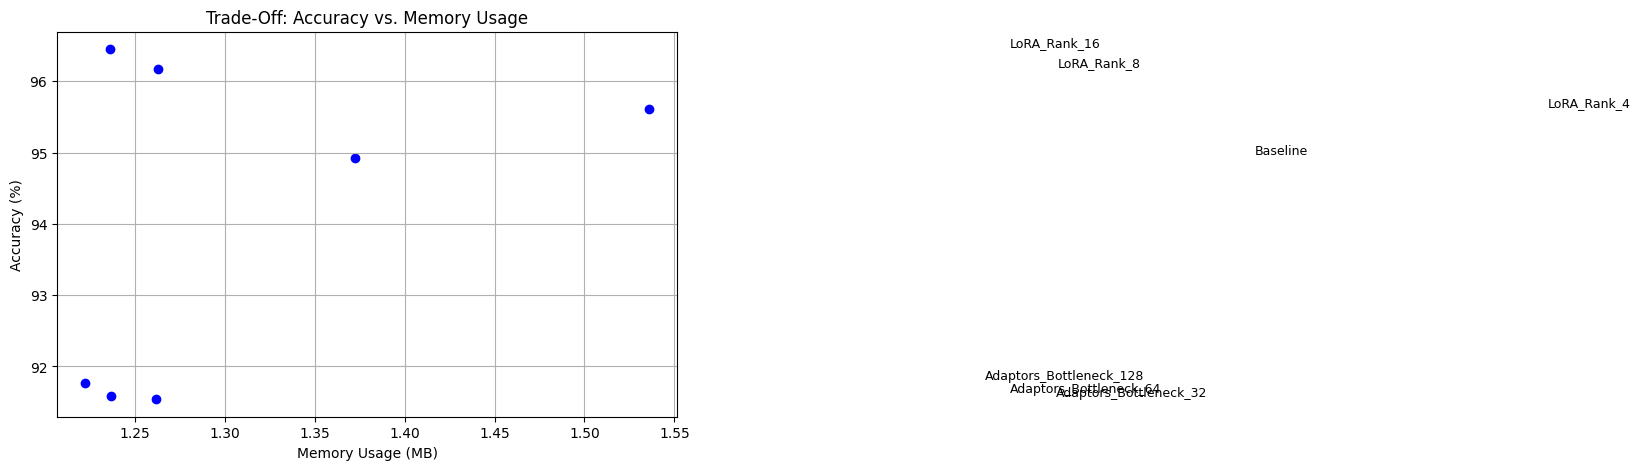

In [ ]:
import matplotlib.pyplot as plt

# Trade-Off Analysis: Accuracy vs. Memory Usage
print("\nTrade-Off Analysis:")
valid_methods = []
accuracies, memory_usages, inference_times = [], [], []

for method, metrics in results.items():
    if "Accuracy" in metrics and "Memory (MB)" in metrics and "Inference Time (ms)" in metrics:
        print(f"{method} -> Accuracy: {metrics['Accuracy']:.2f}%, Memory Usage: {metrics['Memory (MB)']:.2f}MB, Inference Time: {metrics['Inference Time (ms)']:.2f}ms")
        valid_methods.append(method)
        accuracies.append(metrics["Accuracy"])
        memory_usages.append(metrics["Memory (MB)"])
        inference_times.append(metrics["Inference Time (ms)"])
    else:
        print(f"Skipping {method} due to missing data.")

if not valid_methods:
    print("No valid results to plot. Skipping visualization.")
else:
    plt.figure(figsize=(8, 5))
    plt.scatter(memory_usages, accuracies, color="blue", label="Methods")
    for i, method in enumerate(valid_methods):
        plt.text(memory_usages[i] + 0.5, accuracies[i], method, fontsize=9, ha="left", va="bottom")
    plt.xlabel("Memory Usage (MB)")
    plt.ylabel("Accuracy (%)")
    plt.title("Trade-Off: Accuracy vs. Memory Usage")
    plt.grid(True)
    plt.show()


Cell 8a: Measure Peak Memory Usage

---
We defines a function measure_memory_usage to measure the peak memory usage during the training or evaluation process. It starts tracemalloc to monitor memory allocations, then executes either the training or evaluation function as specified, and finally extracts the peak memory usage from tracemalloc's records.


In [ ]:
import tracemalloc

def measure_memory_usage(model, data_loader, criterion, device, type='training'):
    tracemalloc.start()
    if type == 'training':
        optimizer = opm.AdamW(model.parameters(), lr=1e-4)
        train_model(model, optimizer, train_loader, val_loader, criterion, device, epochs=5)
    elif type == 'evaluation':
        evaluate_model(model, data_loader, criterion, device)
    else:
        raise ValueError("type must be either training or evaluation")
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / 10**6  # in MB


Cell 8b: Measure Inference Time

---
The measure_inference_time function calculates the average inference time per batch for a given model and dataset. By measuring the time taken for each batch during evaluation and averaging them, it gives you an idea of how fast your model processes data.

In [ ]:
import time

def measure_inference_time(model, data_loader, criterion, device):
    _, _, avg_inference_time = evaluate_model(model, data_loader, criterion, device)
    return avg_inference_time


Cell 9: Visualization of Results

---
Finally, we create visualizations to compare the performance of different fine-tuning methods across various metrics. We plot bar charts for accuracy, loss, memory usage, and inference time. We also plot scatter plots to visualize the trade-offs between accuracy and inference time, and between accuracy and memory usage.

We also perform configuration sensitivity analysis to understand the impact of Adaptor bottleneck dimension and LoRA rank on accuracy. The results are summarized in a printed output showing the accuracy, loss, memory usage, inference time, and training time for each fine-tuning method.



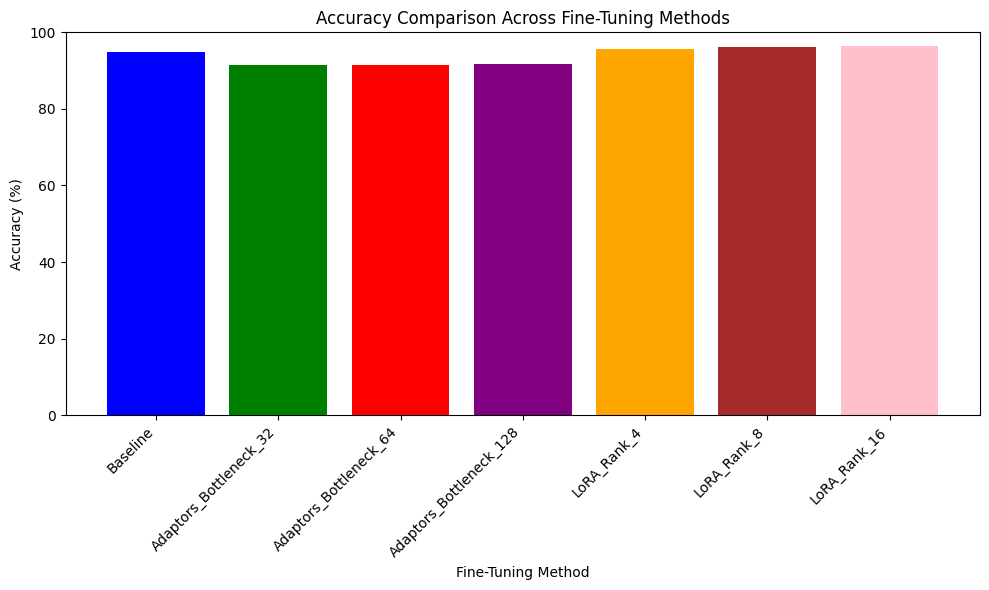

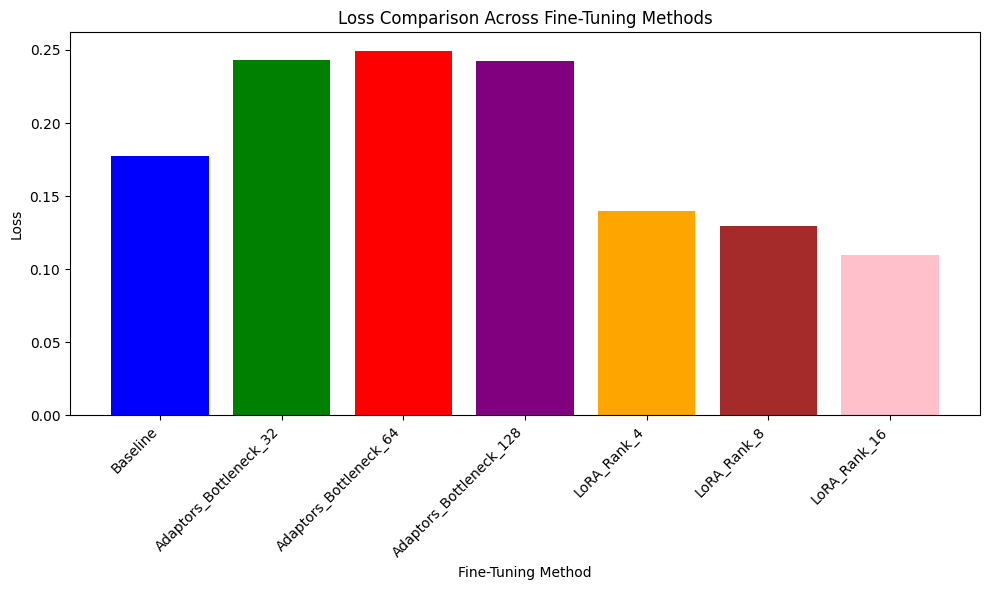

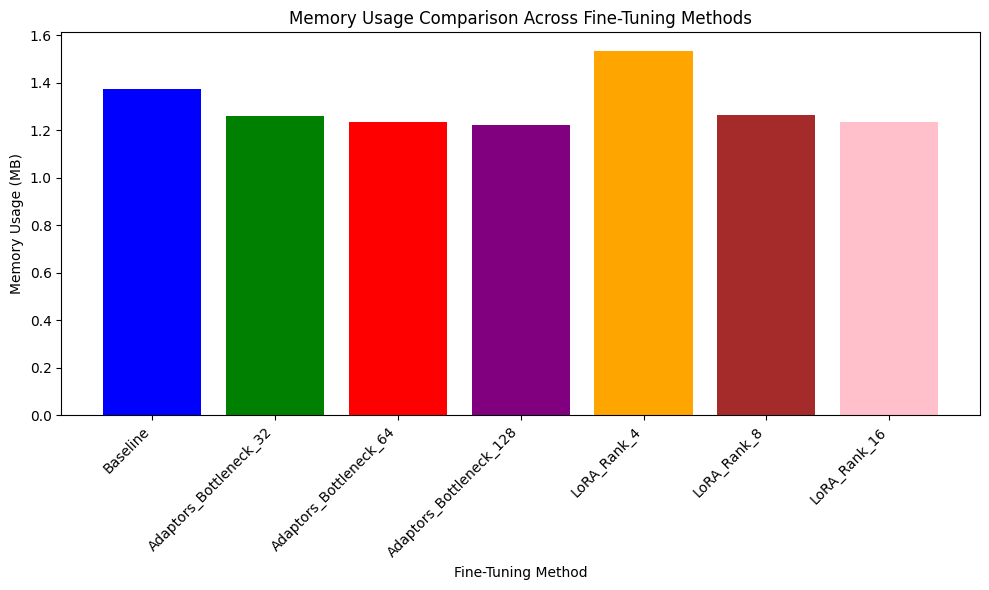

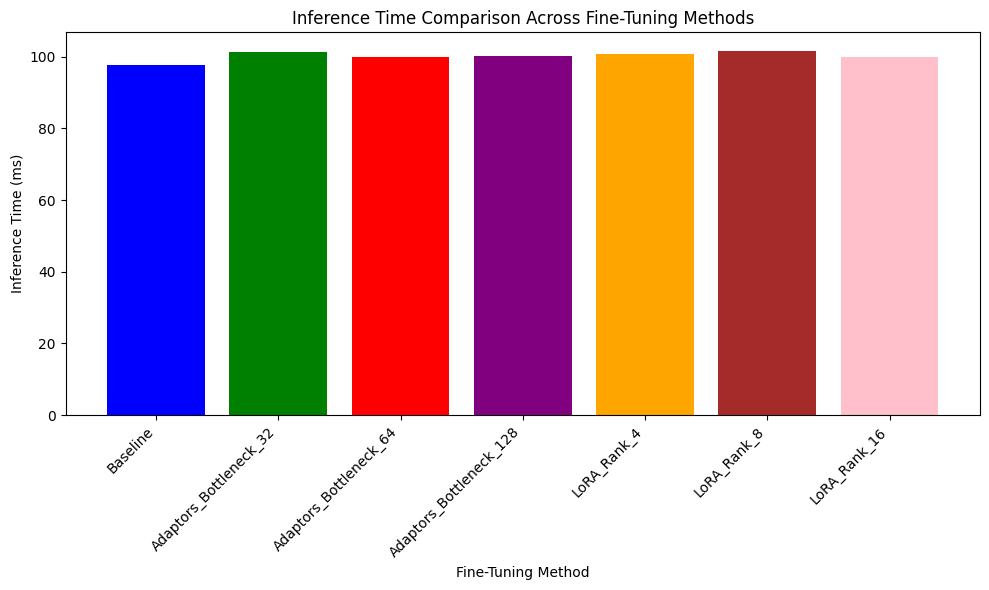

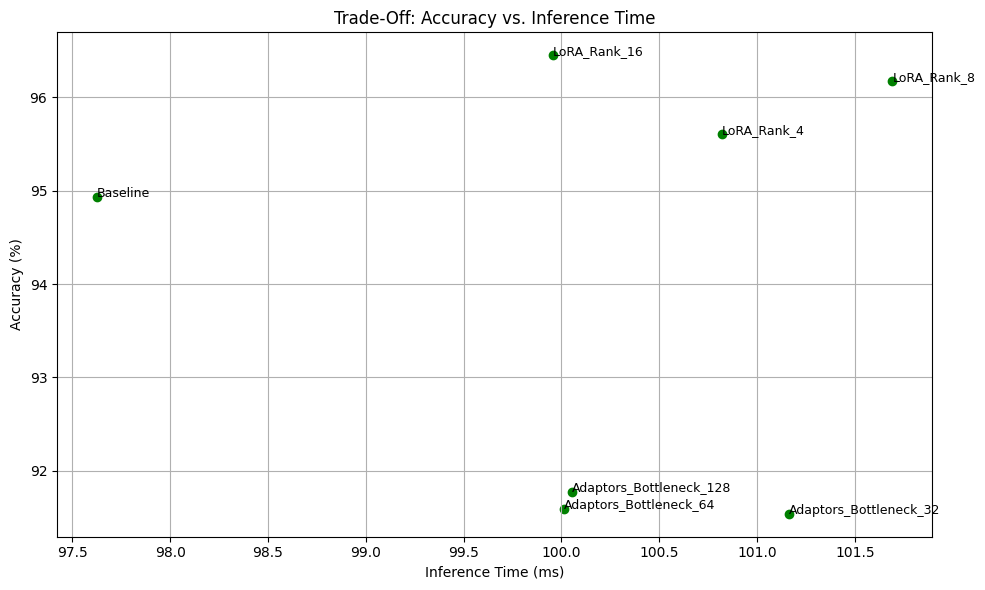

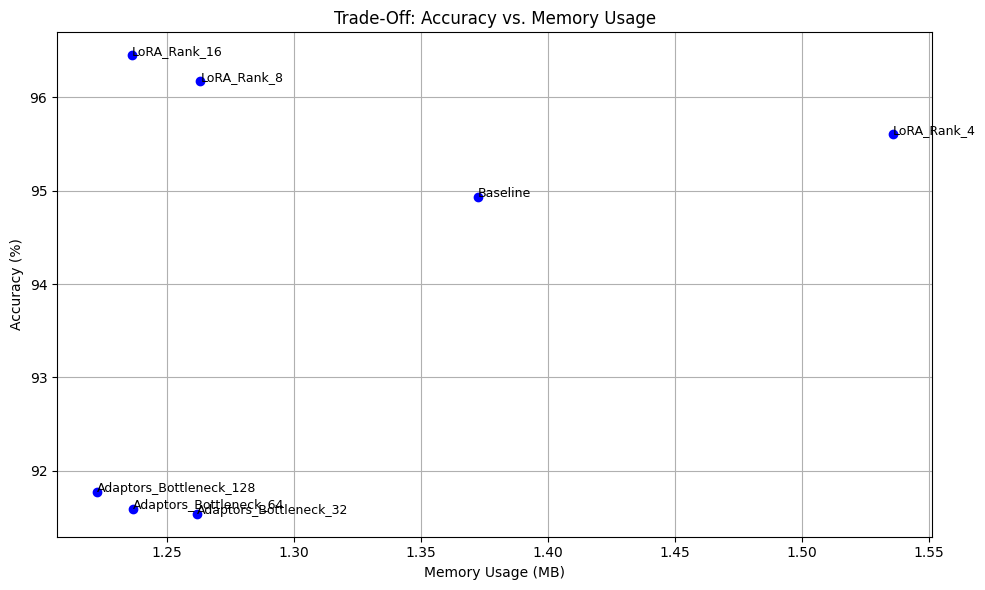

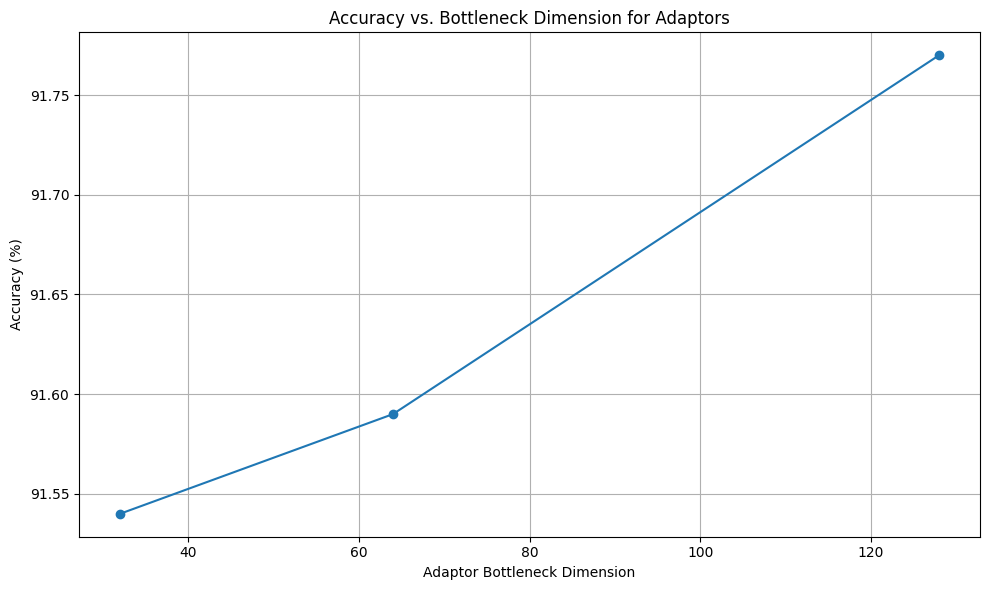

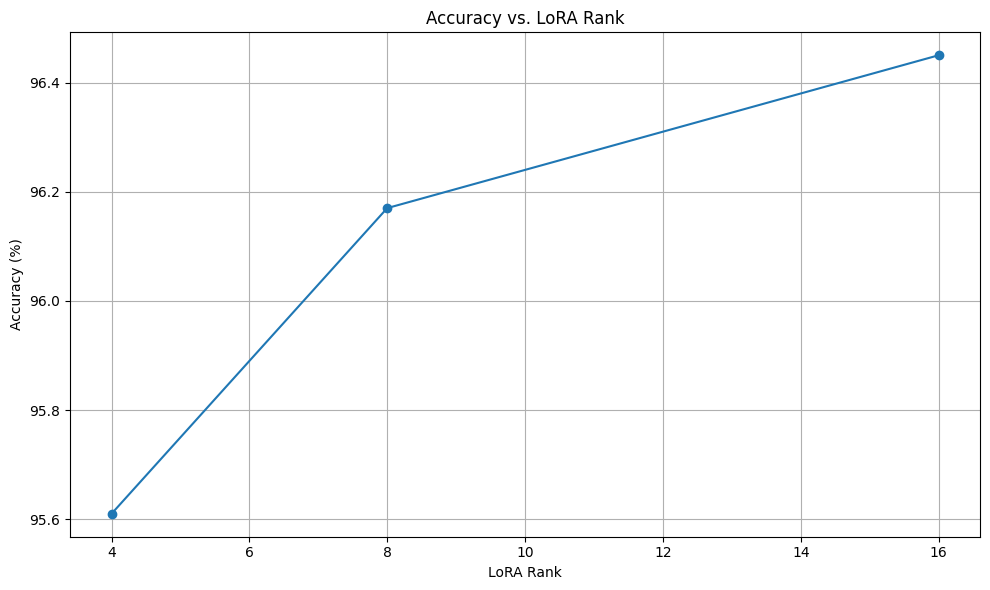


Performance and Efficiency Trade-Offs:
Baseline -> Accuracy: 94.93%, Loss: 0.1773, Memory: 1.37MB, Inference Time: 97.62ms, Training Time: 443.89s
Adaptors_Bottleneck_32 -> Accuracy: 91.54%, Loss: 0.2430, Memory: 1.26MB, Inference Time: 101.16ms, Training Time: 362.21s
Adaptors_Bottleneck_64 -> Accuracy: 91.59%, Loss: 0.2496, Memory: 1.24MB, Inference Time: 100.01ms, Training Time: 364.02s
Adaptors_Bottleneck_128 -> Accuracy: 91.77%, Loss: 0.2427, Memory: 1.22MB, Inference Time: 100.05ms, Training Time: 362.03s
LoRA_Rank_4 -> Accuracy: 95.61%, Loss: 0.1397, Memory: 1.54MB, Inference Time: 100.82ms, Training Time: 423.87s
LoRA_Rank_8 -> Accuracy: 96.17%, Loss: 0.1292, Memory: 1.26MB, Inference Time: 101.69ms, Training Time: 423.83s
LoRA_Rank_16 -> Accuracy: 96.45%, Loss: 0.1095, Memory: 1.24MB, Inference Time: 99.96ms, Training Time: 422.95s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization: Accuracy Comparison
methods = list(results.keys())
accuracies = [results[method]["Accuracy"] for method in methods]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.xlabel("Fine-Tuning Method")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison Across Fine-Tuning Methods")
plt.ylim(0, 100)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Visualization: Loss Comparison
losses = [results[method]["Loss"] for method in methods]

plt.figure(figsize=(10, 6))
plt.bar(methods, losses, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.xlabel("Fine-Tuning Method")
plt.ylabel("Loss")
plt.title("Loss Comparison Across Fine-Tuning Methods")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Visualization: Memory Usage Comparison
memory_usages = [results[method]["Memory (MB)"] for method in methods]

plt.figure(figsize=(10, 6))
plt.bar(methods, memory_usages, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.xlabel("Fine-Tuning Method")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage Comparison Across Fine-Tuning Methods")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Visualization: Inference Time Comparison
inference_times = [results[method]["Inference Time (ms)"] for method in methods]

plt.figure(figsize=(10, 6))
plt.bar(methods, inference_times, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.xlabel("Fine-Tuning Method")
plt.ylabel("Inference Time (ms)")
plt.title("Inference Time Comparison Across Fine-Tuning Methods")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot: Inference Time vs. Accuracy
plt.figure(figsize=(10, 6))
plt.scatter(inference_times, accuracies, color="green")
for i, method in enumerate(methods):
    plt.text(inference_times[i], accuracies[i], method, fontsize=9)
plt.xlabel("Inference Time (ms)")
plt.ylabel("Accuracy (%)")
plt.title("Trade-Off: Accuracy vs. Inference Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Memory Usage vs. Accuracy
plt.figure(figsize=(10, 6))
plt.scatter(memory_usages, accuracies, color="blue")
for i, method in enumerate(methods):
    plt.text(memory_usages[i], accuracies[i], method, fontsize=9)
plt.xlabel("Memory Usage (MB)")
plt.ylabel("Accuracy (%)")
plt.title("Trade-Off: Accuracy vs. Memory Usage")
plt.grid(True)
plt.tight_layout()
plt.show()

# Configuration Sensitivity Analysis
def get_values_for_parameter(parameter, results):
    values = []
    names = []
    for key, metric in results.items():
        if parameter in key:
            try:
                value = float(key.split('_')[-1])
                values.append(value)
                names.append(key)
            except:
                continue
    return np.array(values), names

# Accuracy vs. Bottleneck Dimension for Adaptors
bottleneck_values, bottleneck_names = get_values_for_parameter("Bottleneck", results)
adaptor_accuracies = [results[name]["Accuracy"] for name in bottleneck_names]

plt.figure(figsize=(10, 6))
plt.plot(bottleneck_values, adaptor_accuracies, marker='o')
plt.xlabel("Adaptor Bottleneck Dimension")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Bottleneck Dimension for Adaptors")
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy vs. LoRA Rank
rank_values, rank_names = get_values_for_parameter("Rank", results)
lora_accuracies = [results[name]["Accuracy"] for name in rank_names]

plt.figure(figsize=(10, 6))
plt.plot(rank_values, lora_accuracies, marker='o')
plt.xlabel("LoRA Rank")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. LoRA Rank")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary of Trade-Offs
print("\nPerformance and Efficiency Trade-Offs:")
for method, metrics in results.items():
    print(f"{method} -> Accuracy: {metrics['Accuracy']:.2f}%, Loss: {metrics['Loss']:.4f}, "
          f"Memory: {metrics['Memory (MB)']:.2f}MB, Inference Time: {metrics['Inference Time (ms)']:.2f}ms, "
          f"Training Time: {metrics['Training Time (s)']:.2f}s")
